In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
from sympy.utilities.lambdify import lambdify
from math import factorial
from scipy.integrate import quad

In [2]:
plt.rcParams['figure.figsize'] = [12, 12]

First we will plot the first five Legendre polynomials. We will do this using symbolic expressions with the package sympy.

In [3]:
x = sympy.symbols('x')

In [4]:
X = np.linspace(-1,1,1000)

In [5]:
# An array to hold symbolic expressions for the first five Legendre polynomials
exprs = []

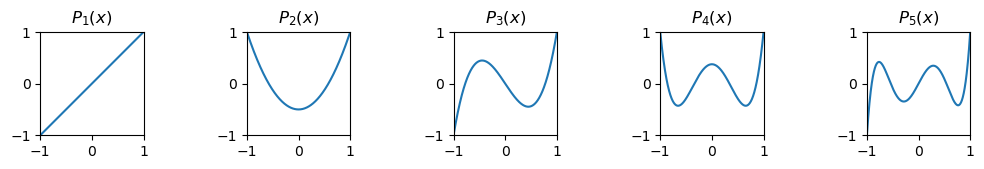

In [6]:
fig, axs = plt.subplots(1,5)
plt.subplots_adjust(hspace=1, wspace=1)

for i in range(1,6):
    # Compute the ith Legendre polynomial
    expr = sympy.diff((x**2 - 1)**i, x, i) / (2**i * factorial(i))
    exprs.append(expr)
    
    # Create a Python function from expr
    func = lambdify(x, expr)
    
    # Plot the ith Legendre polynomial
    ax = axs[i-1]
    ax.plot(X, func(X))
    ax.set_aspect('equal')
    ax.set_xlim(-1,1)
    ax.set_ylim(-1,1)
    ax.set_title(fr'$P_{i}(x)$')

Below we print the five Legendre polynomials, their products, and the integrals of their products. This will show that $\int P_i P_j = 0$ exactly if $i\neq j$.

In [7]:
for i in range(5):
    for j in range(5):
        # Compute the product of P_i and P_j symbolically
        prod = exprs[i] * exprs[j]
        
        # Create a Python function from the symbolic expression
        func = lambdify(x, prod)
        
        # Compute the integral of the product
        integ = quad(func,-1,1)
        
        # Print P_i, P_j, P_i*P_j, and the integral
        print(f'P_{i+1}(x)={exprs[i]}')
        print(f'P_{j+1}(x)={exprs[j]}')
        print(f'P_{i+1}(x)P_{j+1}(x)={prod}')
        print(f'Integral from -1 to 1: {integ[0]:.5f}\n')

P_1(x)=x
P_1(x)=x
P_1(x)P_1(x)=x**2
Integral from -1 to 1: 0.66667

P_1(x)=x
P_2(x)=(3*x**2 - 1)/2
P_1(x)P_2(x)=x*(3*x**2 - 1)/2
Integral from -1 to 1: 0.00000

P_1(x)=x
P_3(x)=x*(5*x**2 - 3)/2
P_1(x)P_3(x)=x**2*(5*x**2 - 3)/2
Integral from -1 to 1: 0.00000

P_1(x)=x
P_4(x)=(8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
P_1(x)P_4(x)=x*(8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
Integral from -1 to 1: 0.00000

P_1(x)=x
P_5(x)=x*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8
P_1(x)P_5(x)=x**2*(8*x**4 + 40*x**2*(x**2 - 1) + 15*(x**2 - 1)**2)/8
Integral from -1 to 1: 0.00000

P_2(x)=(3*x**2 - 1)/2
P_1(x)=x
P_2(x)P_1(x)=x*(3*x**2 - 1)/2
Integral from -1 to 1: 0.00000

P_2(x)=(3*x**2 - 1)/2
P_2(x)=(3*x**2 - 1)/2
P_2(x)P_2(x)=(3*x**2 - 1)**2/4
Integral from -1 to 1: 0.40000

P_2(x)=(3*x**2 - 1)/2
P_3(x)=x*(5*x**2 - 3)/2
P_2(x)P_3(x)=x*(3*x**2 - 1)*(5*x**2 - 3)/4
Integral from -1 to 1: 0.00000

P_2(x)=(3*x**2 - 1)/2
P_4(x)=(8*x**4 + 24*x**2*(x**2 - 1) + 3*(x**2 - 1)**2)/8
P_2(x)P_